In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot

import folium
import json
import os

import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [3]:
df_im = pd.read_csv('C:/Users/mmqq2/Kdigital/05. 공모전/Sejong_Si/Data/20.세종시_전입자수.csv')
df_ex = pd.read_csv('C:/Users/mmqq2/Kdigital/05. 공모전/Sejong_Si/Data/21.세종시_전출자수.csv')

In [4]:
with open('C:/Users/mmqq2/Kdigital/05. 공모전/Sejong_Si/Data/32.세종시_행정경계(읍면동).geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

In [59]:
# df_im.head()

In [60]:
# df_im.info()

In [6]:
df_im['세종전입행정동'] = df_im['세종전입행정동'].astype('str')
df_ex['세종전출행정동'] = df_ex['세종전출행정동'].astype('str')

In [7]:
df_im['date'] = pd.to_datetime(df_im['년월'].astype('str'),format = '%Y%m')
df_ex['date'] = pd.to_datetime(df_ex['년월'].astype('str'),format = '%Y%m')

In [8]:
df_im['year'] = pd.to_datetime(df_im['date']).dt.to_period(freq = 'Y')
df_ex['year'] = pd.to_datetime(df_ex['date']).dt.to_period(freq = 'Y')

In [9]:
df_im['yearm'] = pd.to_datetime(df_im['date']).dt.to_period(freq = 'M')
df_ex['yearm'] = pd.to_datetime(df_ex['date']).dt.to_period(freq = 'M')

In [10]:
# df_ex.head()

In [11]:
df_im_2017 = df_im[df_im['year'] == '2017']
df_im_2018 = df_im[df_im['year'] == '2018']
df_im_2019 = df_im[df_im['year'] == '2019']
df_im_2020 = df_im[df_im['year'] == '2020']
df_im_2021 = df_im[df_im['year'] == '2021']

In [12]:
df_ex_2017 = df_ex[df_ex['year'] == '2017']
df_ex_2018 = df_ex[df_ex['year'] == '2018']
df_ex_2019 = df_ex[df_ex['year'] == '2019']
df_ex_2020 = df_ex[df_ex['year'] == '2020']
df_ex_2021 = df_ex[df_ex['year'] == '2021']

In [13]:
df_im_2017 = df_im_2017.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2017 = df_im_2017.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2018 = df_im_2018.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2018 = df_im_2018.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2019 = df_im_2019.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2019 = df_im_2019.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2020 = df_im_2020.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2020 = df_im_2020.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

df_im_2021 = df_im_2021.groupby(['yearm','년월','세종전입행정동'],as_index=False).sum()
df_im_2021 = df_im_2021.sort_values(by=['yearm','년월','세종전입행정동'],ascending=True)

In [14]:
df_ex_2017 = df_ex_2017.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2017 = df_ex_2017.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2018 = df_ex_2018.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2018 = df_ex_2018.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2019 = df_ex_2019.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2019 = df_ex_2019.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2020 = df_ex_2020.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2020 = df_ex_2020.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

df_ex_2021 = df_ex_2021.groupby(['yearm','년월','세종전출행정동'],as_index=False).sum()
df_ex_2021 = df_ex_2021.sort_values(by=['yearm','년월','세종전출행정동'],ascending=True)

In [15]:
# df_im_2017.head()

In [16]:
# df_ex_2017.head()

In [17]:
df_2017 = pd.concat([df_im_2017,df_ex_2017['전출자수']],axis=1)
df_2017 = df_2017.fillna(0)
df_2017['순전입자수'] = df_2017['전입자수']-df_2017['전출자수']
df_2017['month'] = df_2017['yearm'].dt.month

df_2018 = pd.concat([df_im_2018,df_ex_2018['전출자수']],axis=1)
df_2018 = df_2018.fillna(0)
df_2018['순전입자수'] = df_2018['전입자수']-df_2018['전출자수']
df_2018['month'] = df_2018['yearm'].dt.month

df_2019 = pd.concat([df_im_2019,df_ex_2019['전출자수']],axis=1)
df_2019 = df_2019.fillna(0)
df_2019['순전입자수'] = df_2019['전입자수']-df_2019['전출자수']
df_2019['month'] = df_2019['yearm'].dt.month

df_2020 = pd.concat([df_im_2020,df_ex_2020['전출자수']],axis=1)
df_2020 = df_2020.fillna(0)
df_2020['순전입자수'] = df_2020['전입자수']-df_2020['전출자수']
df_2020['month'] = df_2020['yearm'].dt.month

df_2021 = pd.concat([df_im_2021,df_ex_2021['전출자수']],axis=1)
df_2021 = df_2021.fillna(0)
df_2021['순전입자수'] = df_2021['전입자수']-df_2021['전출자수']
df_2021['month'] = df_2021['yearm'].dt.month

In [19]:
center = [36.3, 127.16]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=geo,
    data=df_2017,
    columns=('세종전입행정동', '순전입자수'),
    key_on='feature.properties.ADM_DR_NM',
    fill_color='OrRd',
#     fill_opacity=1,
    legend_name='순전입자수',
).add_to(m)
m

In [20]:
center = [36.3, 127.16]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=geo,
    data=df_2018,
    columns=('세종전입행정동', '순전입자수'),
    key_on='feature.properties.ADM_DR_NM',
    fill_color='OrRd',
#     fill_opacity=1,
    legend_name='순전입자수',
).add_to(m)
m

In [21]:
center = [36.3, 127.16]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=geo,
    data=df_2019,
    columns=('세종전입행정동', '순전입자수'),
    key_on='feature.properties.ADM_DR_NM',
    fill_color='OrRd',
#     fill_opacity=1,
    legend_name='순전입자수',
).add_to(m)
m

In [31]:
center = [36.3, 127.16]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=geo,
    data=df_2020,
    columns=('세종전입행정동', '순전입자수'),
    key_on='feature.properties.ADM_DR_NM',
    fill_color='OrRd',
#     fill_opacity=1,
    legend_name='순전입자수',
).add_to(m)
m

In [73]:
# df_2020 = pd.concat([df_2020,df_2021],axis=0,ignore_index=True)

In [74]:
df_2017.sort_values(by='전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
77   2017-05  201705     한솔동  24959  2164.0  22795.0      5
93   2017-06  201706     한솔동  19918  3079.0  16839.0      6
33   2017-03  201703     보람동  14167   788.0  13379.0      3
127  2017-08  201708     한솔동  13209  1753.0  11456.0      8
110  2017-07  201707     한솔동  13118  1973.0  11145.0      7

In [75]:
df_2017.sort_values(by='전출자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수   전출자수   순전입자수  month
194  2017-12  201712     한솔동  1516    0.0  1516.0     12
193  2017-12  201712     종촌동  2544    0.0  2544.0     12
17   2017-02  201702     보람동  1841   82.0  1759.0      2
182  2017-12  201712     부강면   792  130.0   662.0     12
83   2017-06  201706     소정면   209  153.0    56.0      6

In [76]:
df_2017.sort_values(by='순전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
77   2017-05  201705     한솔동  24959  2164.0  22795.0      5
93   2017-06  201706     한솔동  19918  3079.0  16839.0      6
33   2017-03  201703     보람동  14167   788.0  13379.0      3
127  2017-08  201708     한솔동  13209  1753.0  11456.0      8
110  2017-07  201707     한솔동  13118  1973.0  11145.0      7

In [77]:
df_2017.sort_values(by='순전입자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수    전출자수   순전입자수  month
123  2017-08  201708     전동면   456  8903.0 -8447.0      8
173  2017-11  201711     전동면   165  7794.0 -7629.0     11
107  2017-07  201707     전의면   824  8373.0 -7549.0      7
190  2017-12  201712     전동면   447  7828.0 -7381.0     12
139  2017-09  201709     전동면   363  7447.0 -7084.0      9

In [78]:
df_2018.sort_values(by='전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
56  2018-04  201804     새롬동  23302  2646.0  20656.0      4
22  2018-02  201802     새롬동  15050  2002.0  13048.0      2
73  2018-05  201805     새롬동  14358  3083.0  11275.0      5
39  2018-03  201803     새롬동  14211  1828.0  12383.0      3
90  2018-06  201806     새롬동  13848  2768.0  11080.0      6

In [79]:
df_2018.sort_values(by='전출자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수   전출자수   순전입자수  month
216  2018-12  201812     한솔동  1436    0.0  1436.0     12
104  2018-07  201807     대평동  1909  117.0  1792.0      7
192  2018-11  201811     장군면   891  130.0   761.0     11
40   2018-03  201803     소정면   145  141.0     4.0      3
129  2018-08  201808     소담동  1590  144.0  1446.0      8

In [80]:
df_2018.sort_values(by='순전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
56  2018-04  201804     새롬동  23302  2646.0  20656.0      4
22  2018-02  201802     새롬동  15050  2002.0  13048.0      2
39  2018-03  201803     새롬동  14211  1828.0  12383.0      3
73  2018-05  201805     새롬동  14358  3083.0  11275.0      5
90  2018-06  201806     새롬동  13848  2768.0  11080.0      6

In [81]:
df_2018.sort_values(by='순전입자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수    전출자수   순전입자수  month
194  2018-11  201811     전의면   330  7629.0 -7299.0     11
175  2018-10  201810     전의면   438  7624.0 -7186.0     10
137  2018-08  201808     전의면   493  7209.0 -6716.0      8
213  2018-12  201812     전의면   500  7077.0 -6577.0     12
156  2018-09  201809     전의면   750  5286.0 -4536.0      9

In [82]:
df_2019.sort_values(by='전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수  전출자수  순전입자수  month
120  2019-07  201907     새롬동  11050  4183   6867      7
178  2019-10  201910     소담동  10205  3050   7155     10
19   2019-02  201902     고운동  10020  2620   7400      2
159  2019-09  201909     소담동   8640  4127   4513      9
92   2019-05  201905    조치원읍   8486  7602    884      5

In [83]:
df_2019.sort_values(by='전출자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수  전출자수  순전입자수  month
198  2019-11  201911     소정면    68    58     10     11
103  2019-06  201906     소정면    65    76    -11      6
27   2019-02  201902     소정면   258   141    117      2
87   2019-05  201905     연동면   179   157     22      5
217  2019-12  201912     소정면   184   166     18     12

In [84]:
df_2019.sort_values(by='순전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수  전출자수  순전입자수  month
19   2019-02  201902     고운동  10020  2620   7400      2
178  2019-10  201910     소담동  10205  3050   7155     10
120  2019-07  201907     새롬동  11050  4183   6867      7
121  2019-07  201907     소담동   7997  1695   6302      7
197  2019-11  201911     소담동   8367  2501   5866     11

In [85]:
df_2019.sort_values(by='순전입자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수  전출자수  순전입자수  month
16   2019-01  201901    조치원읍  7229  8390  -1161      1
149  2019-08  201908    조치원읍  6909  7638   -729      8
221  2019-12  201912     연서면   861  1533   -672     12
130  2019-07  201907    조치원읍  6880  7445   -565      7
98   2019-06  201906     도담동  2171  2730   -559      6

In [86]:
df_2020.sort_values(by='전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
178  2020-10  202010     도담동  19061  1465.0  17596.0     10
198  2020-11  202011     도담동  14112  1616.0  12496.0     11
231  2020-12  202012    조치원읍  10588  3004.0   7584.0     12
151  2020-08  202008    조치원읍   9624  1926.0   7698.0      8
191  2020-10  202010    조치원읍   9533  2950.0   6583.0     10

In [87]:
df_2020.sort_values(by='전출자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수   전출자수   순전입자수  month
233  2020-12  202012     한솔동  1545    0.0  1545.0     12
122  2020-07  202007     소담동  1786  100.0  1686.0      7
46   2020-03  202003     소정면   240  135.0   105.0      3
84   2020-05  202005     소정면   124  147.0   -23.0      5
8    2020-01  202001     소정면   187  148.0    39.0      1

In [88]:
df_2020.sort_values(by='순전입자수',ascending=False).head()

yearm      년월 세종전입행정동   전입자수    전출자수    순전입자수  month
178  2020-10  202010     도담동  19061  1465.0  17596.0     10
198  2020-11  202011     도담동  14112  1616.0  12496.0     11
151  2020-08  202008    조치원읍   9624  1926.0   7698.0      8
231  2020-12  202012    조치원읍  10588  3004.0   7584.0     12
216  2020-12  202012     다정동   7910   929.0   6981.0     12

In [89]:
df_2020.sort_values(by='순전입자수',ascending=True).head()

yearm      년월 세종전입행정동  전입자수    전출자수   순전입자수  month
230  2020-12  202012     전의면   733  9915.0 -9182.0     12
150  2020-08  202008     전의면   553  9625.0 -9072.0      8
130  2020-07  202007     전의면   546  8189.0 -7643.0      7
210  2020-11  202011     전의면   631  8124.0 -7493.0     11
190  2020-10  202010     전의면   982  8407.0 -7425.0     10

In [90]:
df_list = [df_2017,df_2018,df_2019,df_2020,df_2021]
for i in range(len(df_list)):
    print(df_list[i]['세종전입행정동'].unique())
    print(len(df_list[i]['세종전입행정동'].unique()))

['금남면' '도담동' '부강면' '소정면' '아름동' '연기면' '연동면' '연서면' '장군면' '전동면' '전의면' '조치원읍'
 '종촌동' '한솔동' '고운동' '보람동' '새롬동']
17
['고운동' '금남면' '도담동' '보람동' '부강면' '새롬동' '소정면' '아름동' '연기면' '연동면' '연서면' '장군면'
 '전동면' '전의면' '조치원읍' '종촌동' '한솔동' '대평동' '소담동' '다정동']
20
['고운동' '금남면' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면' '연동면'
 '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동']
19
['고운동' '금남면' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면' '연동면'
 '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동' '다정동']
20
['고운동' '금남면' '다정동' '대평동' '도담동' '보람동' '부강면' '새롬동' '소담동' '소정면' '아름동' '연기면'
 '연동면' '연서면' '장군면' '전동면' '전의면' '조치원읍' '종촌동' '한솔동']
20


In [39]:
# len(df_2017['세종전입행정동'].unique())

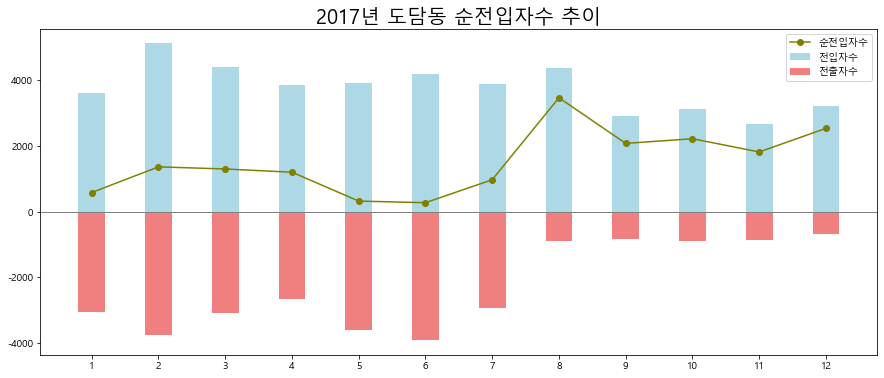

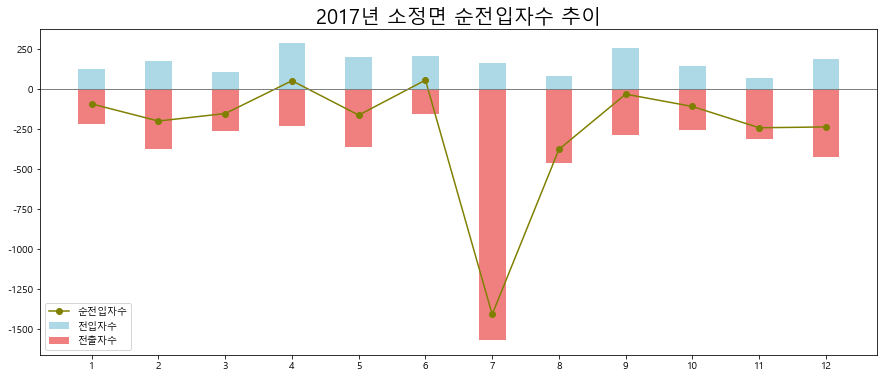

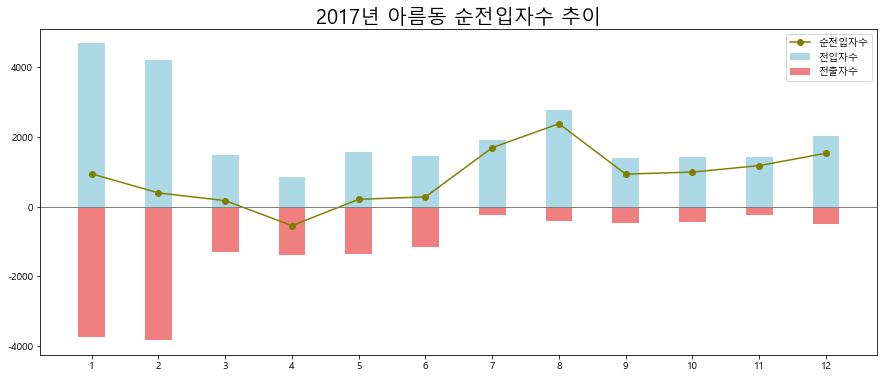

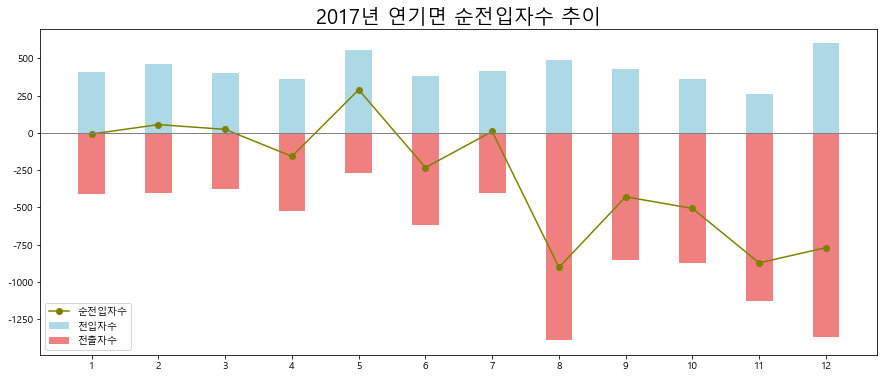

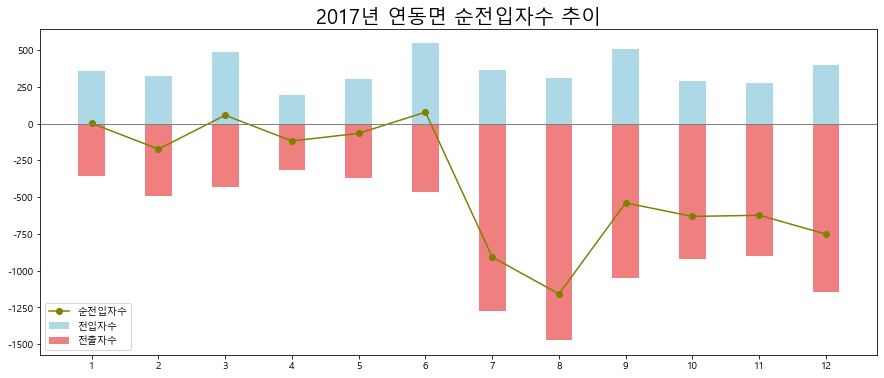

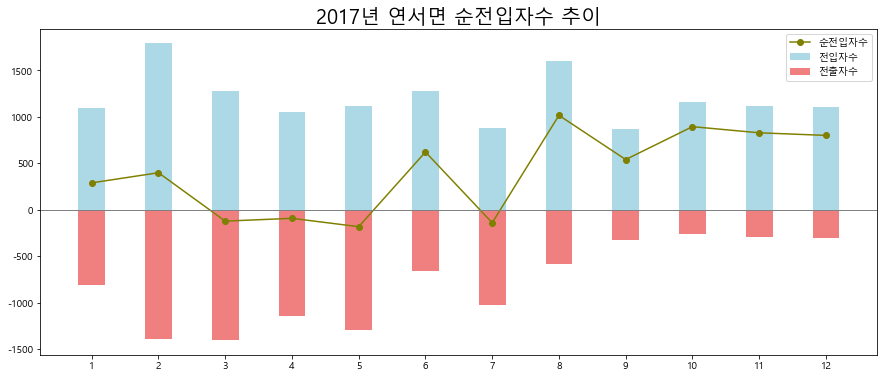

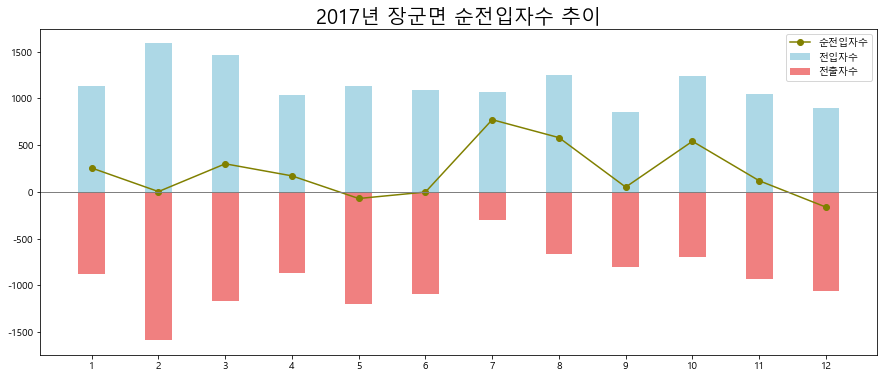

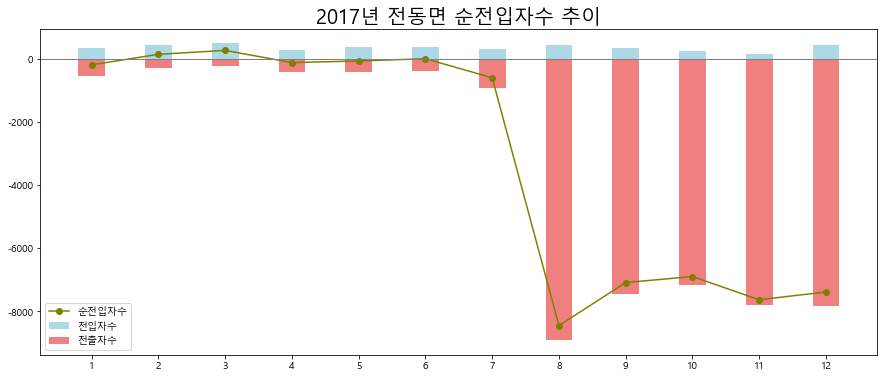

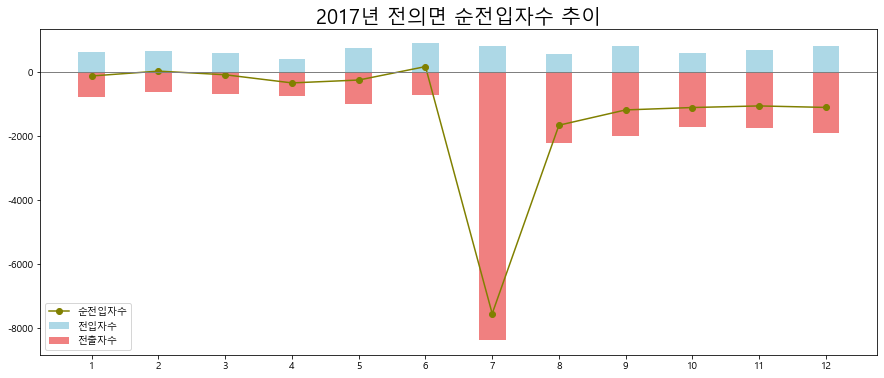

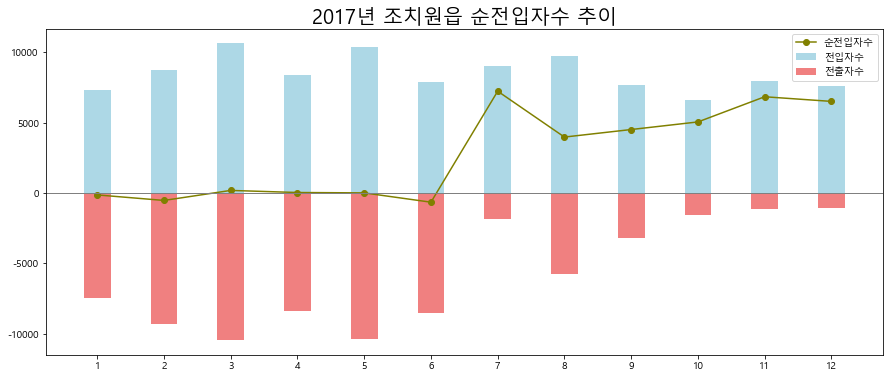

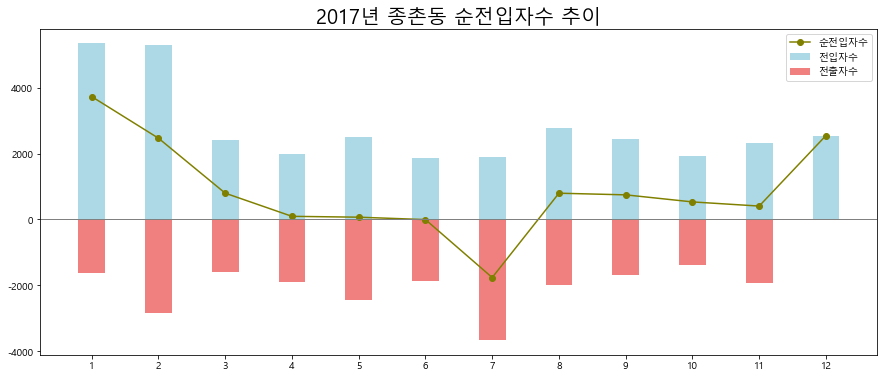

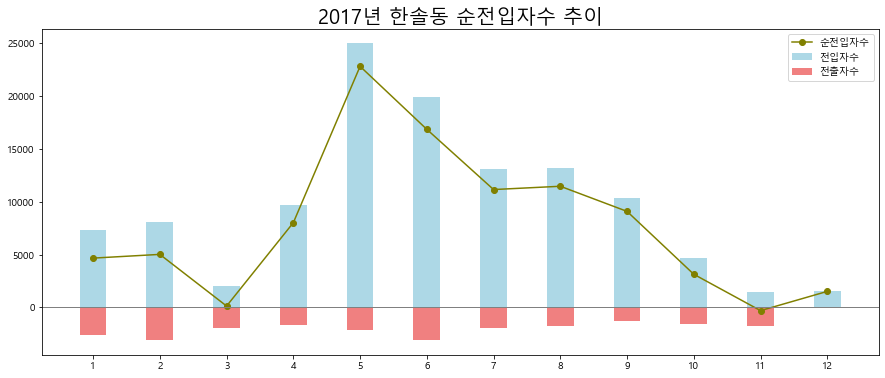

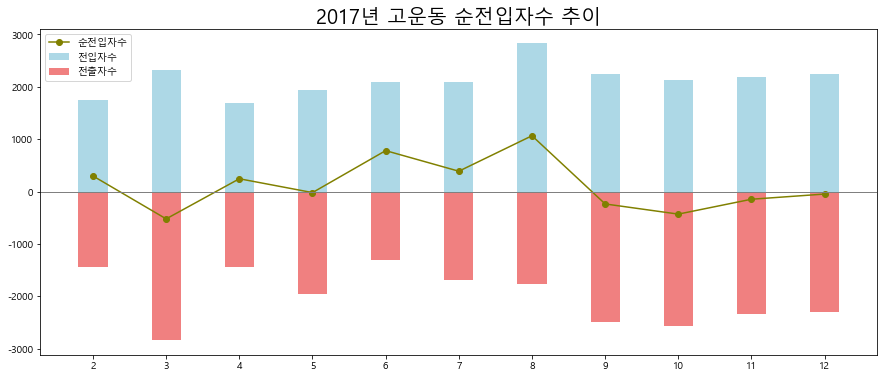

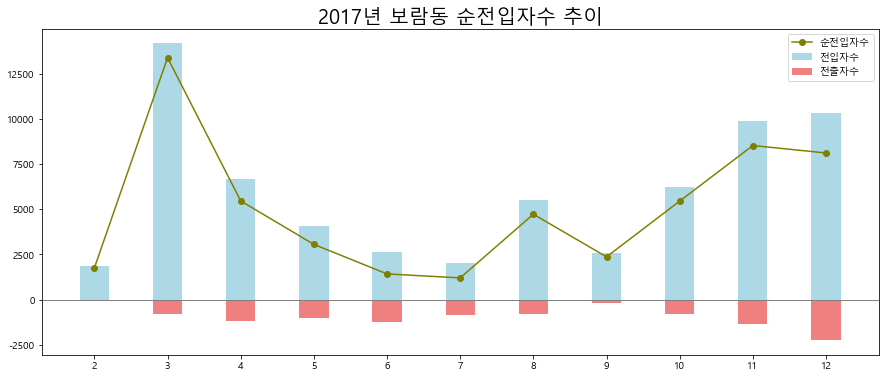

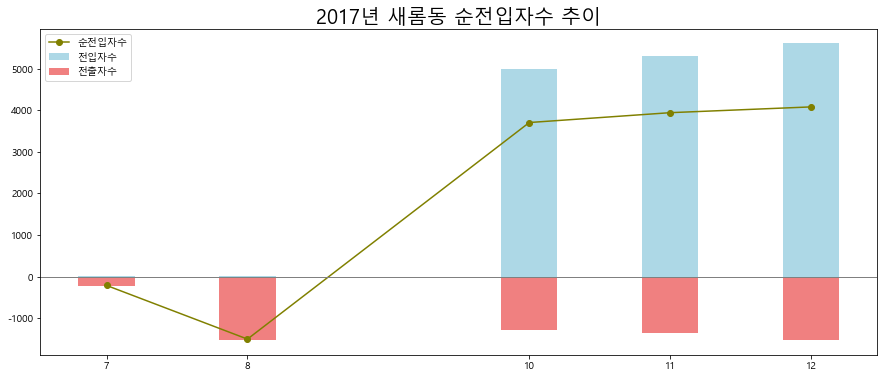

In [52]:
loc_list = ['금남면', '도담동', '부강면', '소정면', '아름동', '연기면', '연동면', '연서면', '장군면',
            '전동면', '전의면', '조치원읍', '종촌동', '한솔동', '고운동', '보람동', '새롬동']

for i,v in enumerate(loc_list):
    df_i = df_2017[df_2017['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'])
    plt.legend()
    plt.title('2017년 {} 순전입자수 추이'.format(v),fontsize=20)
    plt.show()

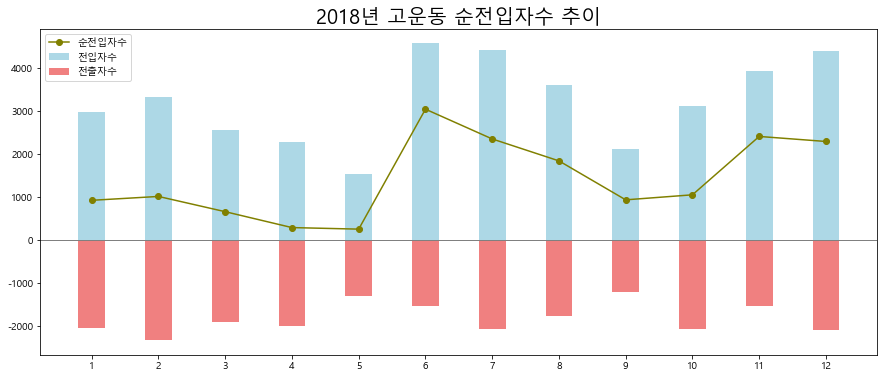

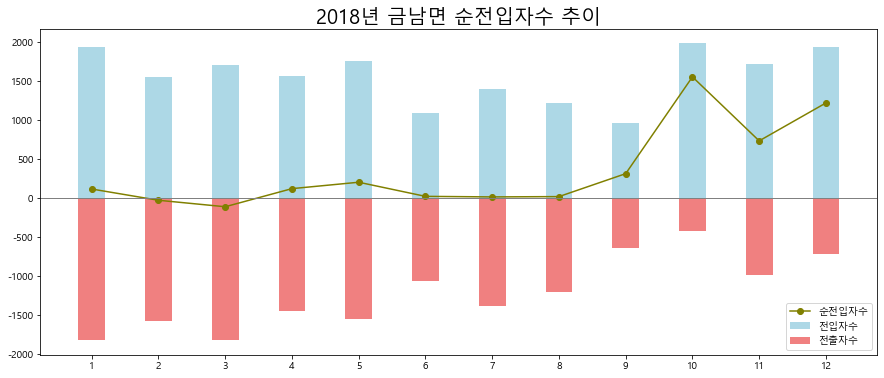

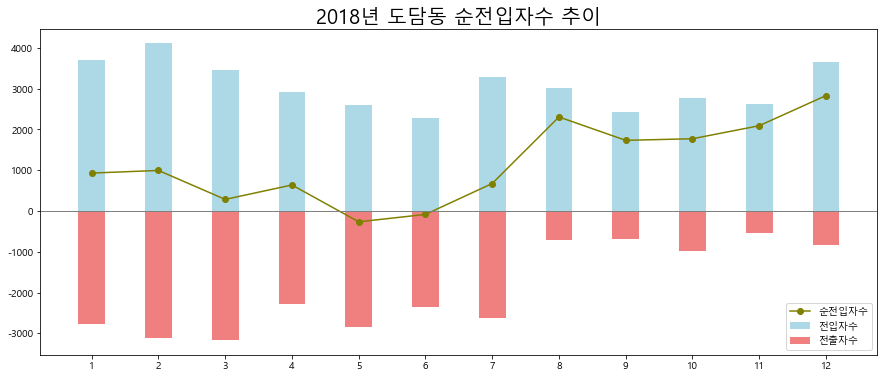

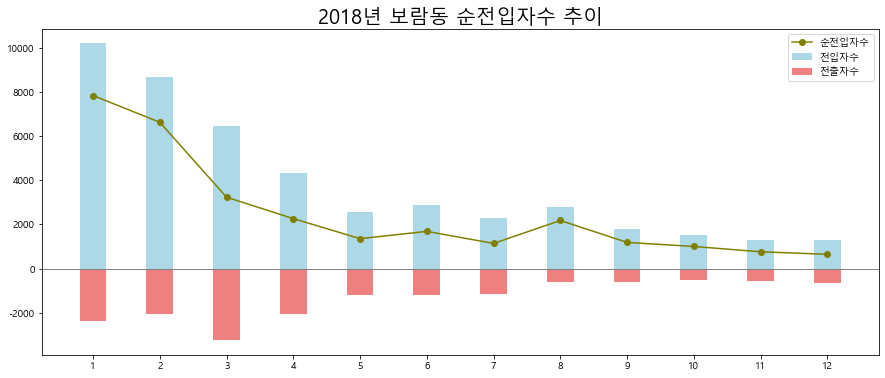

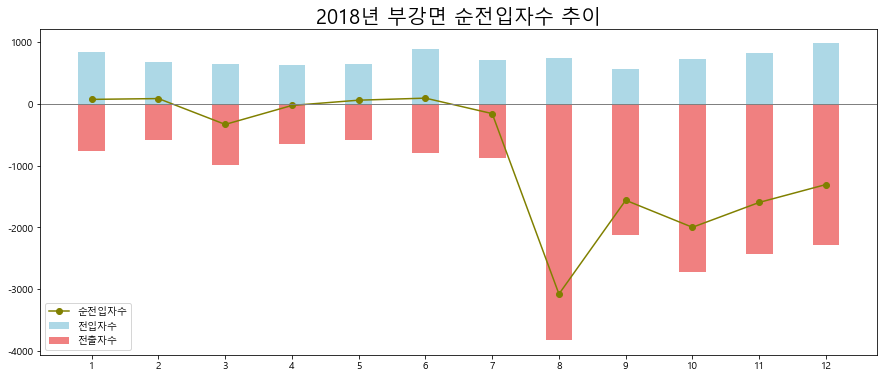

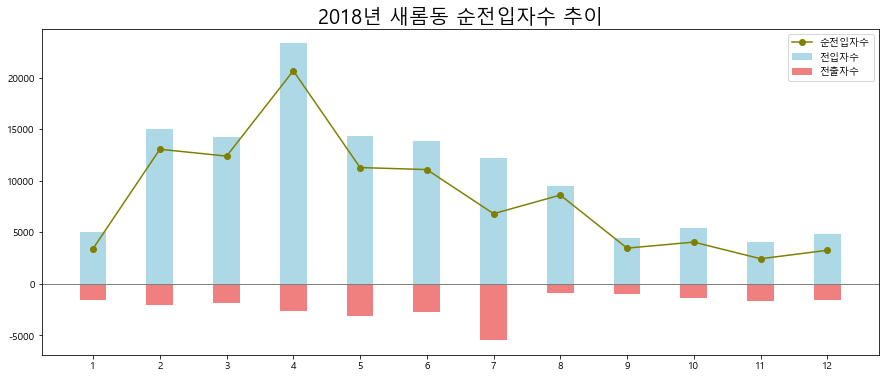

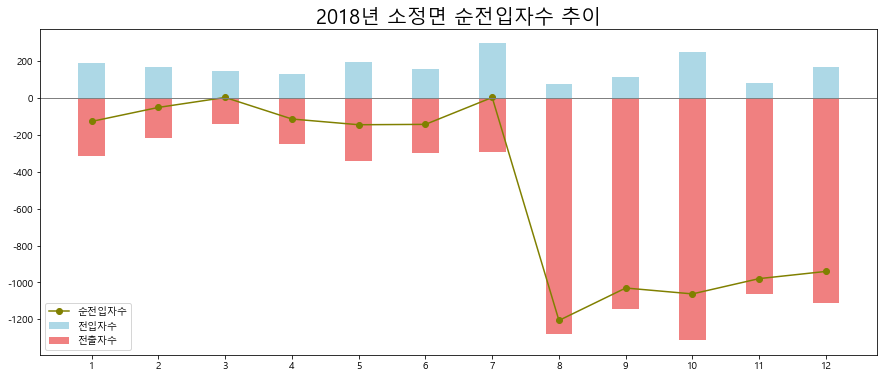

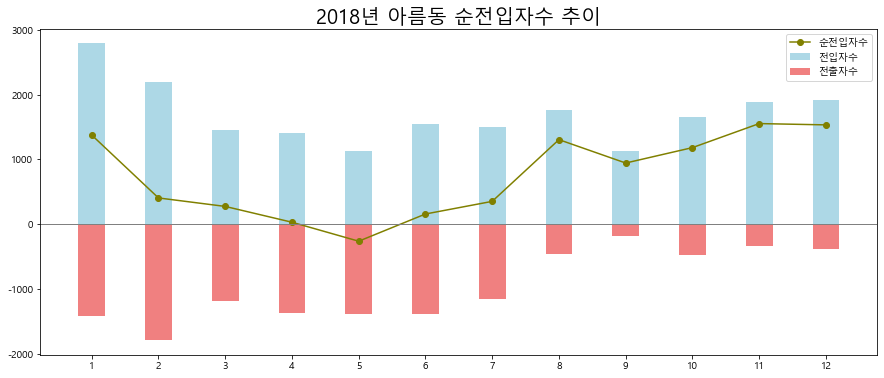

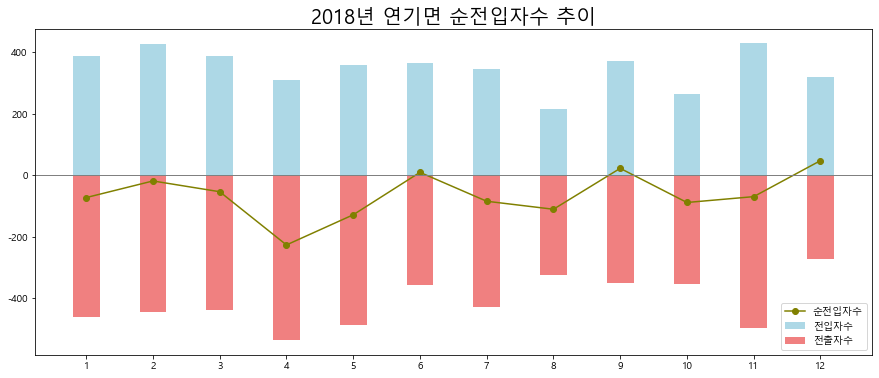

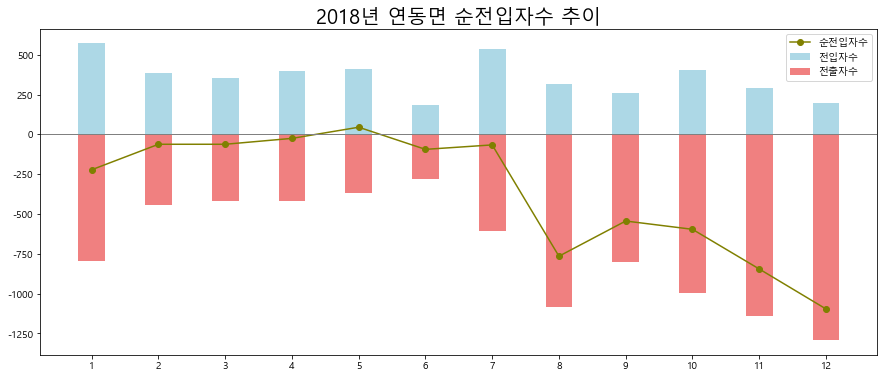

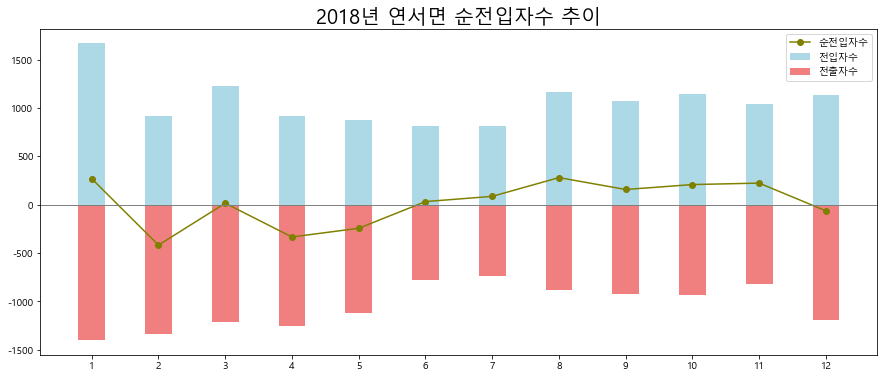

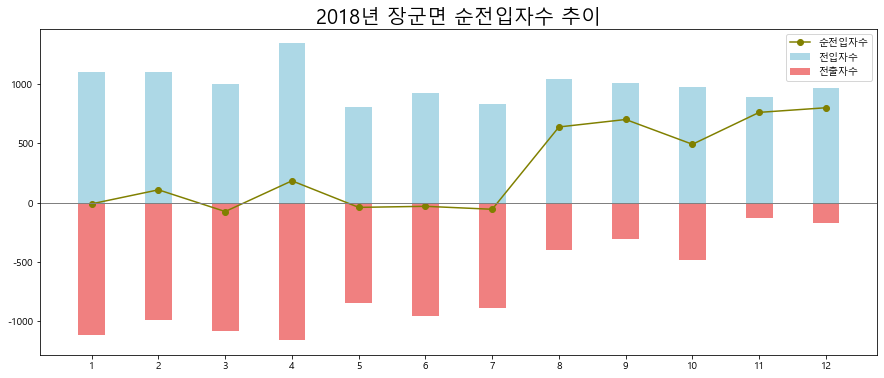

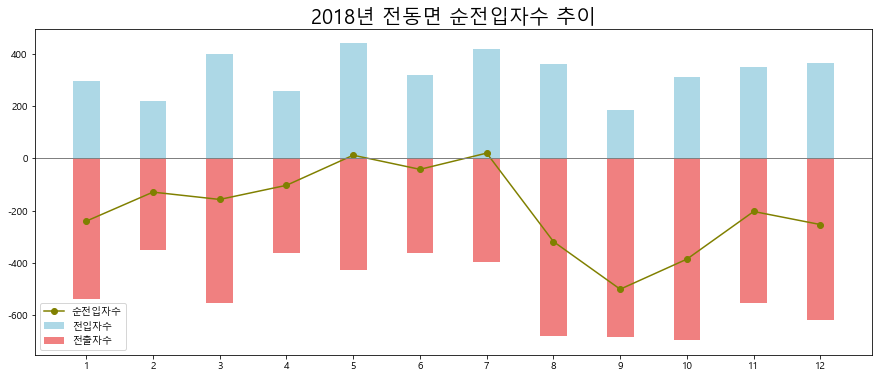

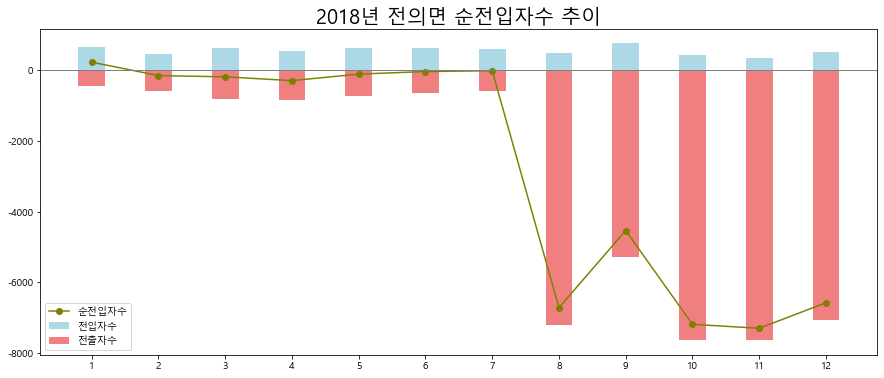

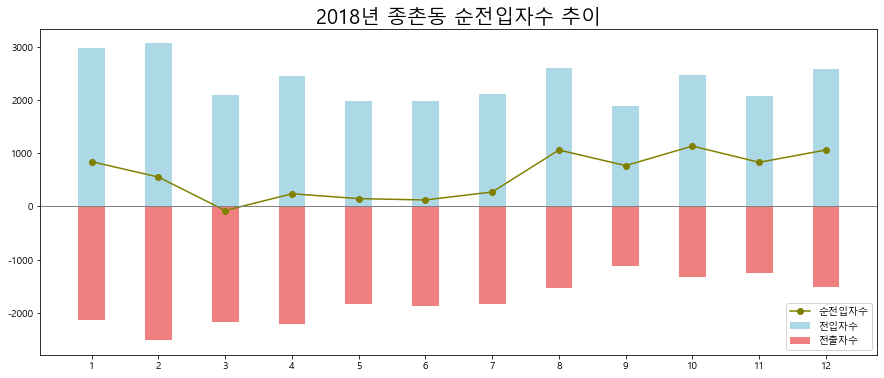

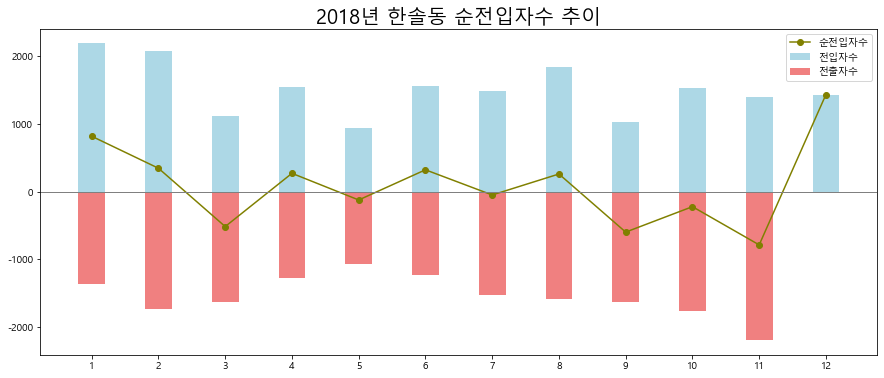

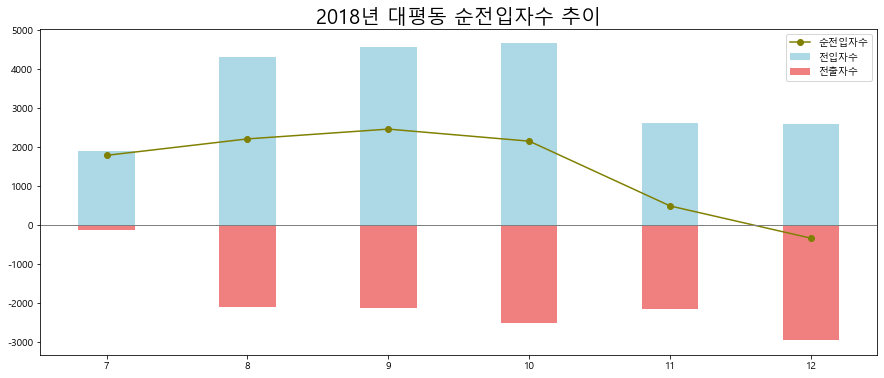

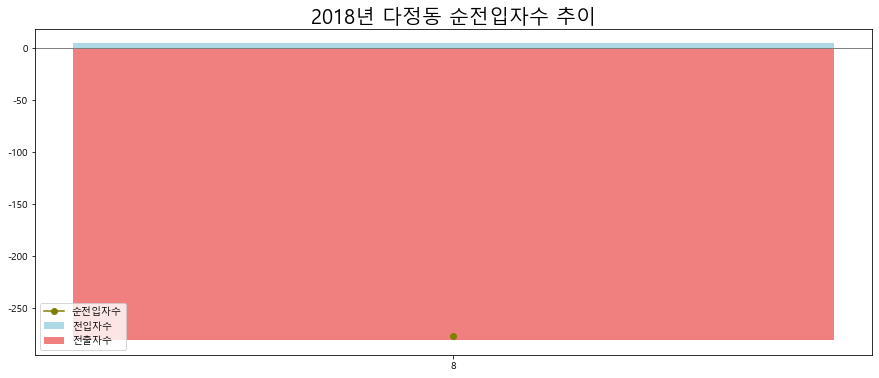

In [55]:
loc_list = ['고운동', '금남면', '도담동', '보람동', '부강면', '새롬동', '소정면', '아름동', '연기면',
            '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동', '대평동', '소담동', '다정동']

for i,v in enumerate(loc_list):
    df_i = df_2018[df_2018['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['month'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['month'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['month'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['month'])
    plt.legend()
    plt.title('2018년 {} 순전입자수 추이'.format(v),fontsize=20)
    plt.show()

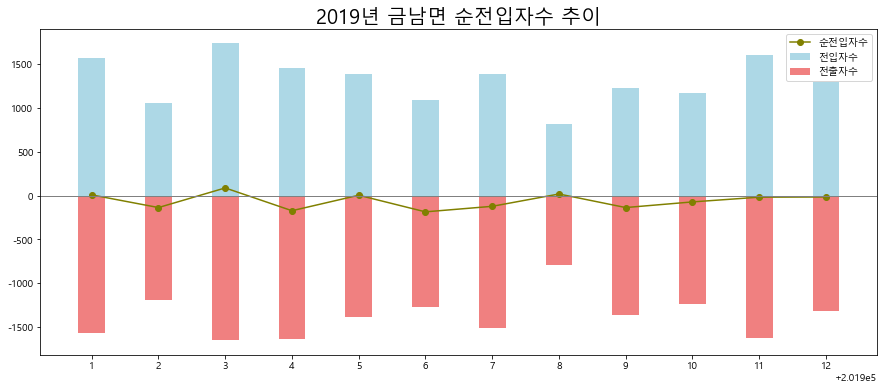

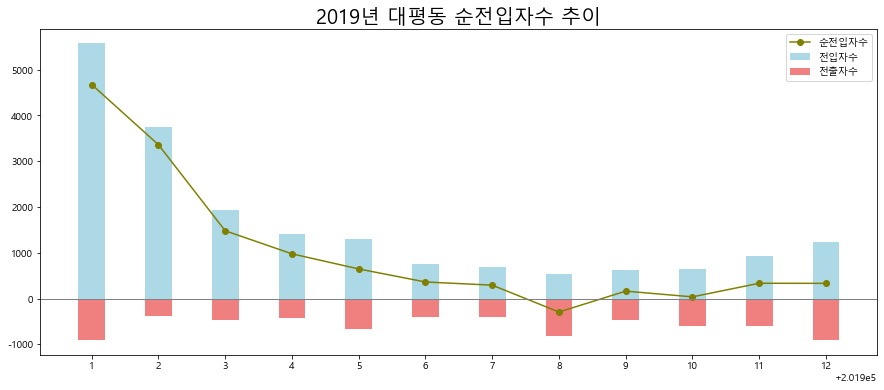

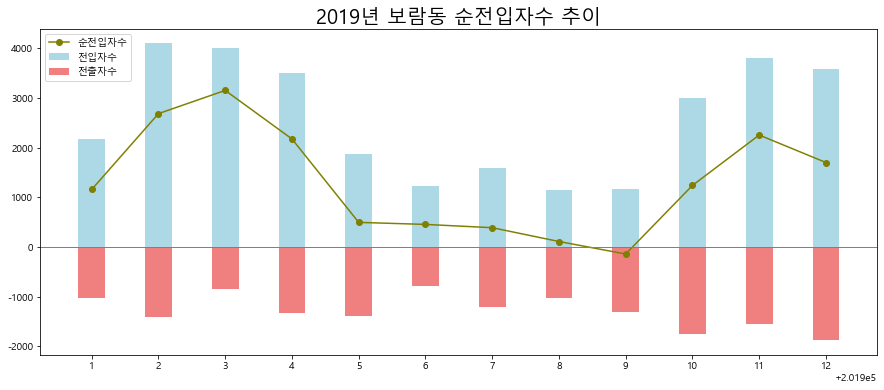

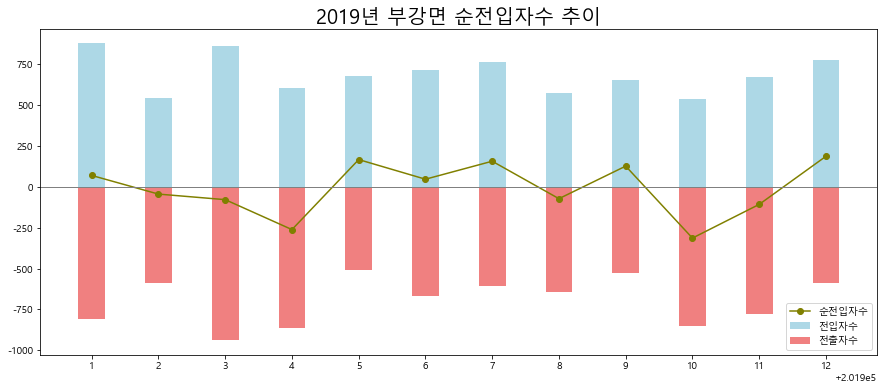

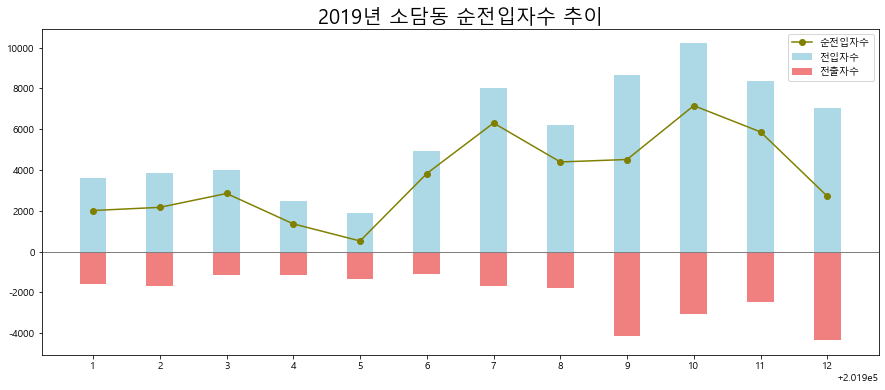

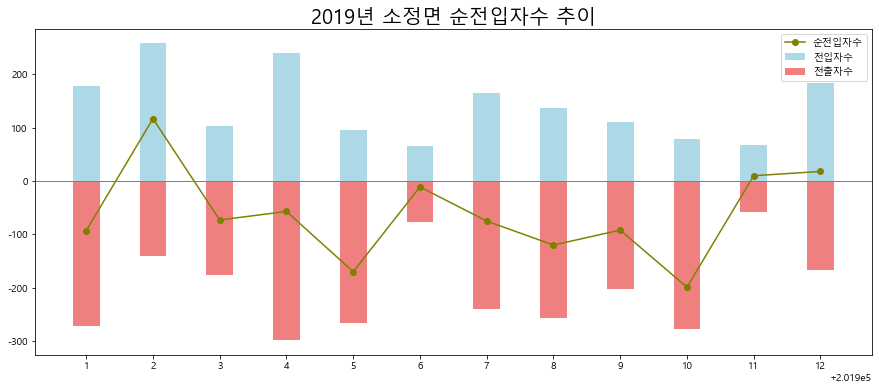

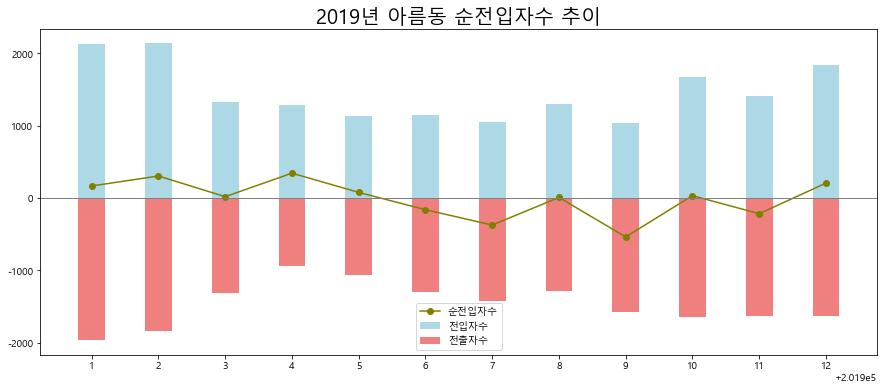

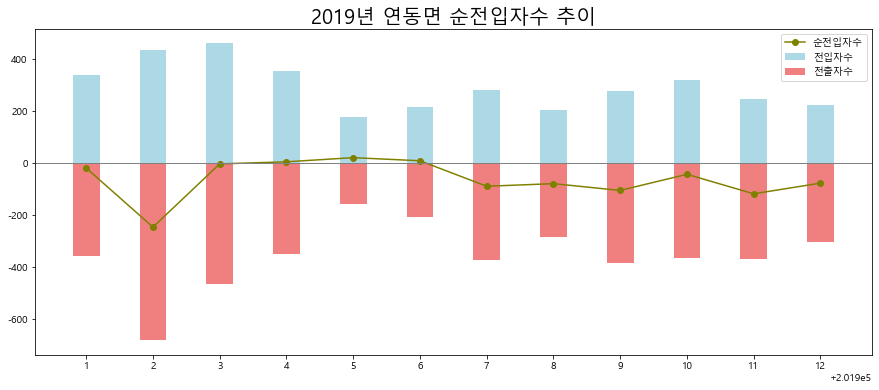

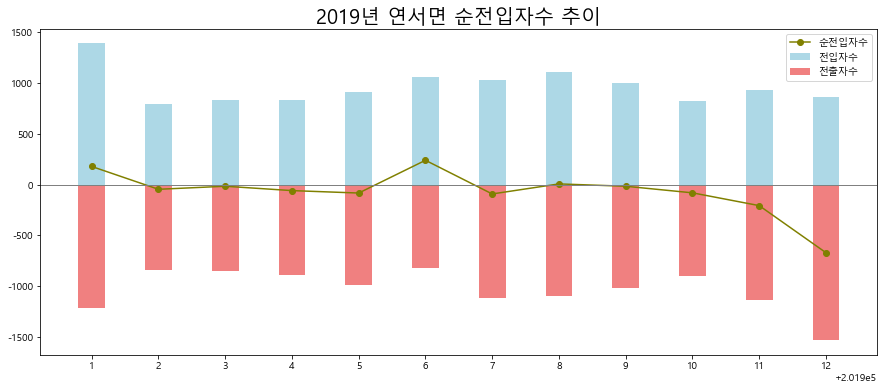

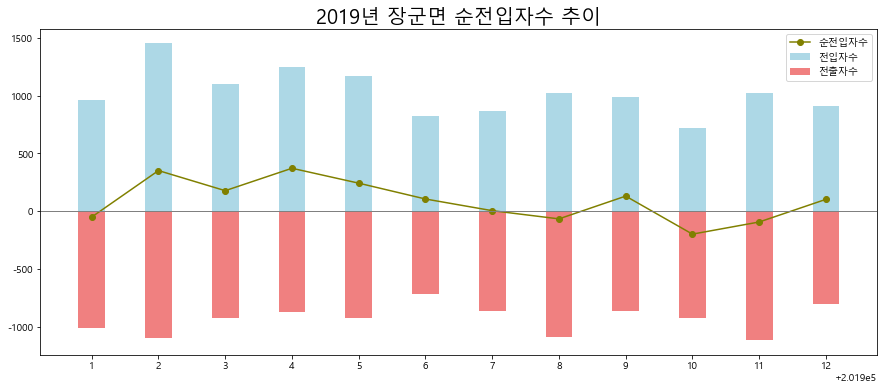

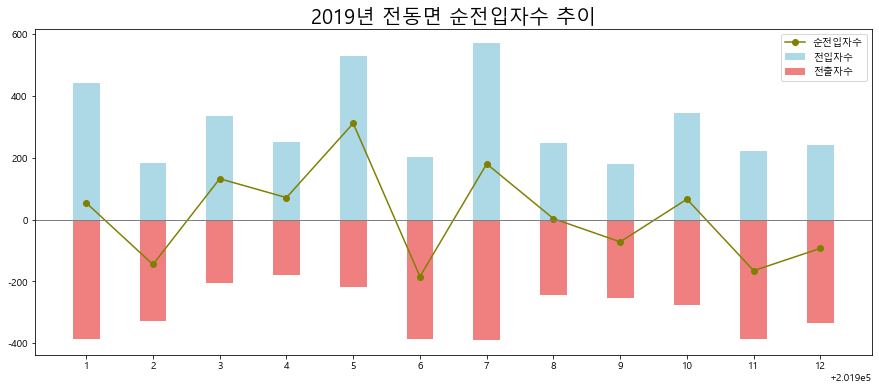

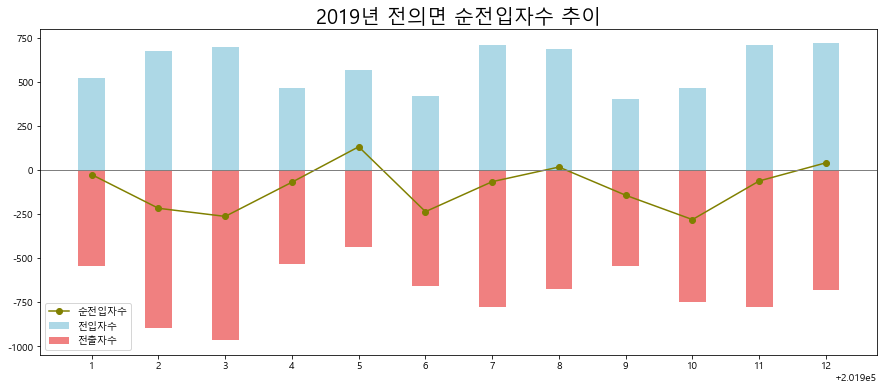

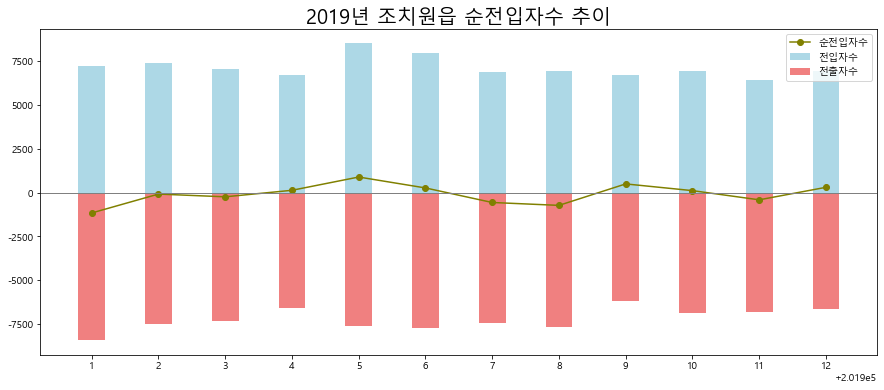

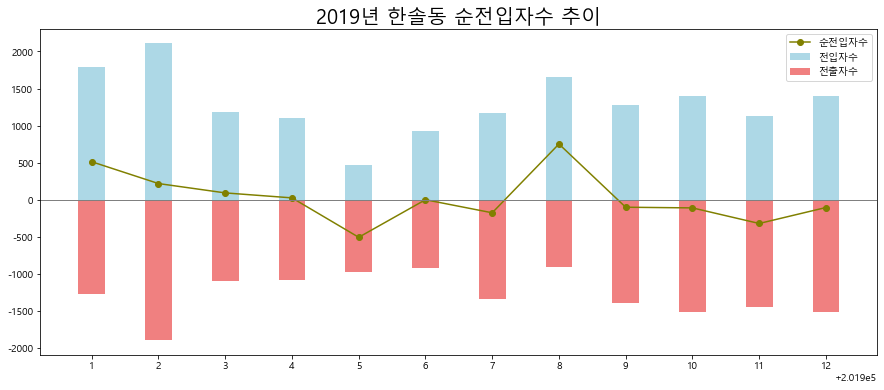

In [107]:
loc_list = ['고운동', '금남면', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면',
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동']

for i,v in enumerate(loc_list):
    df_i = df_2019[df_2019['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['년월'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['년월'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['년월'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['년월'])
    plt.legend()
    plt.title('2019년 {} 순전입자수 추이'.format(v),fontsize=20)
    plt.show()

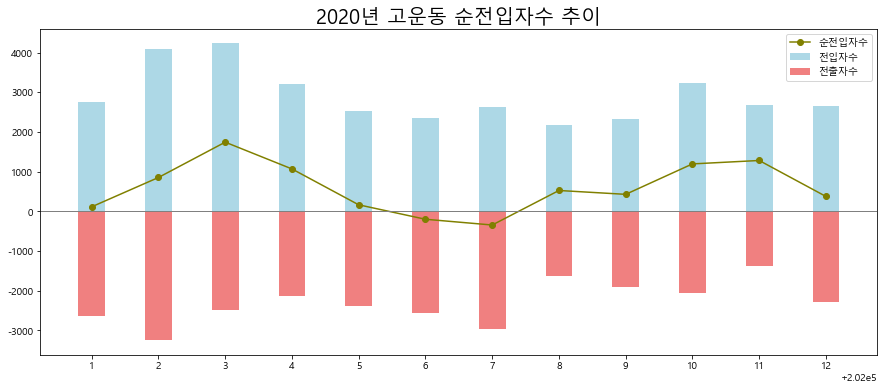

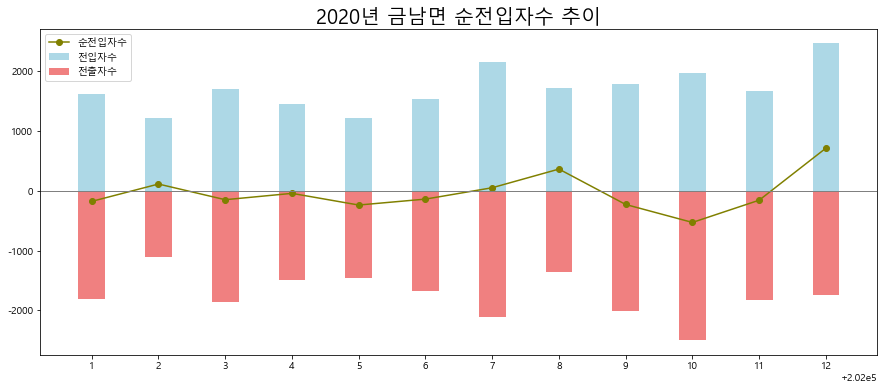

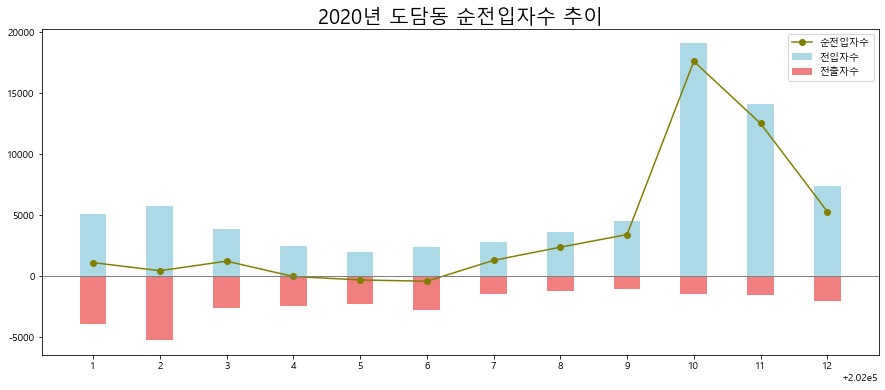

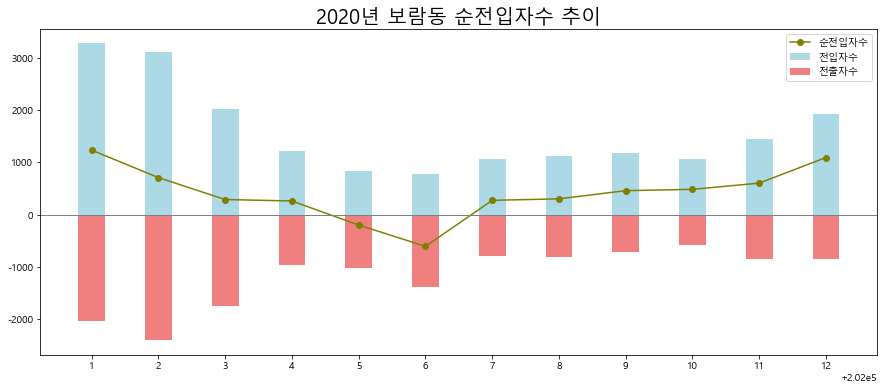

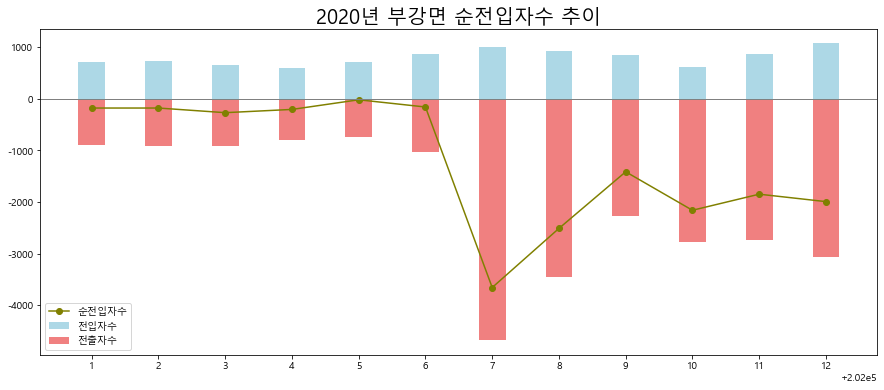

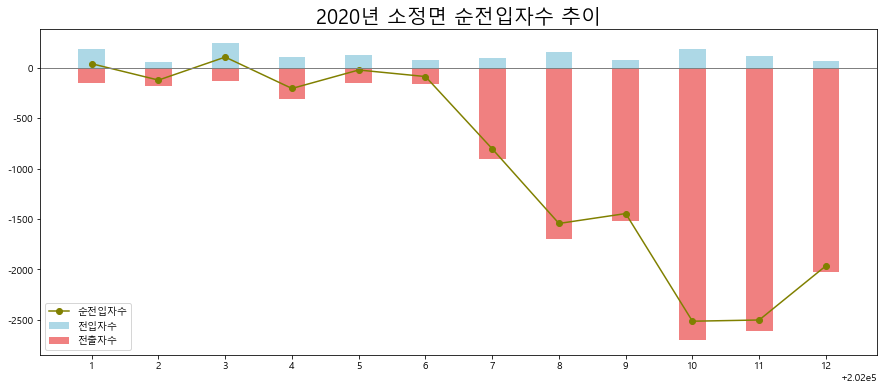

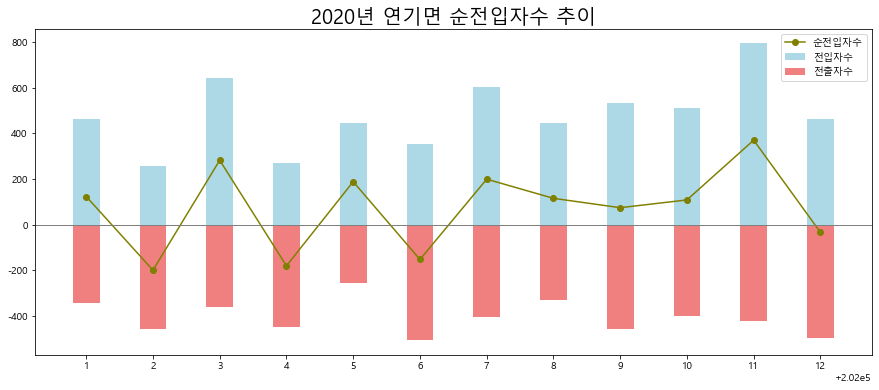

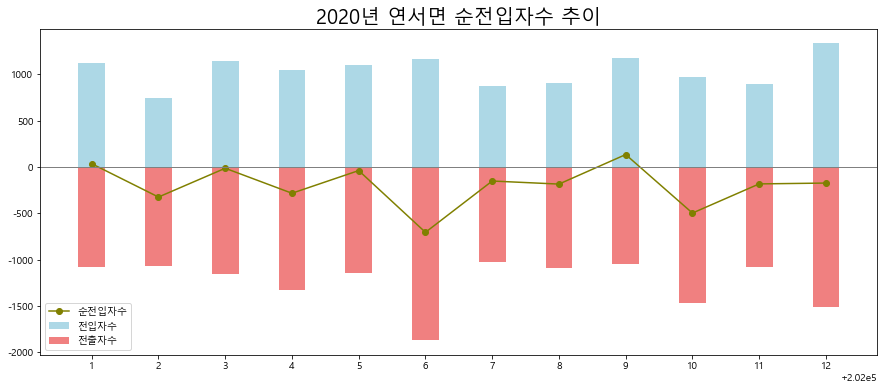

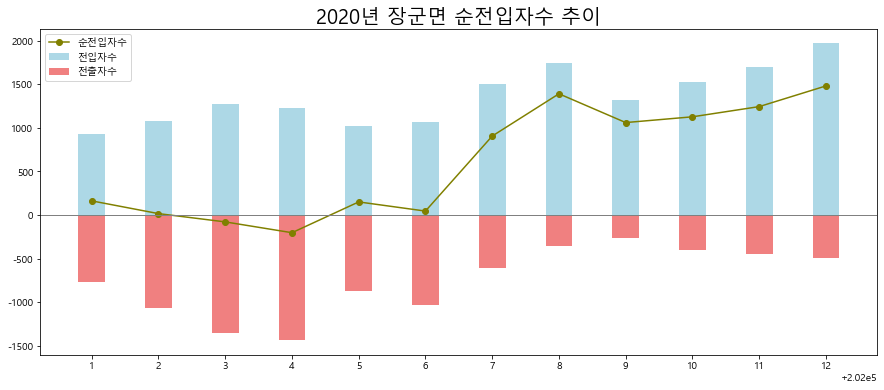

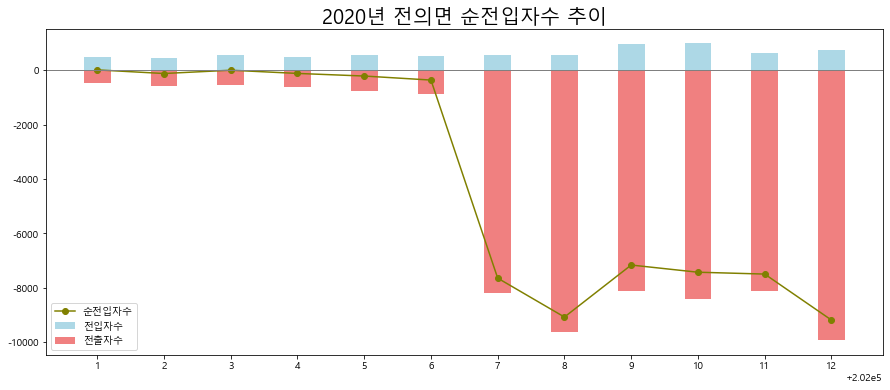

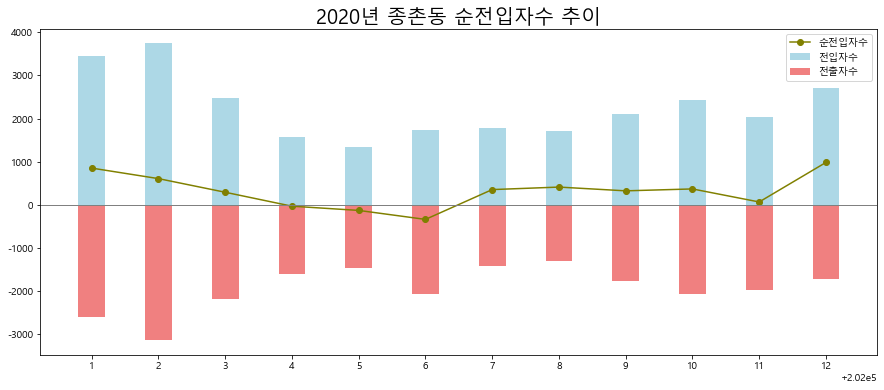

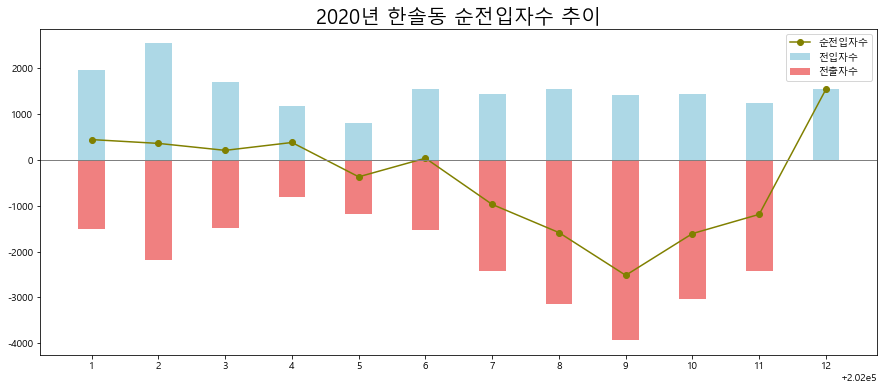

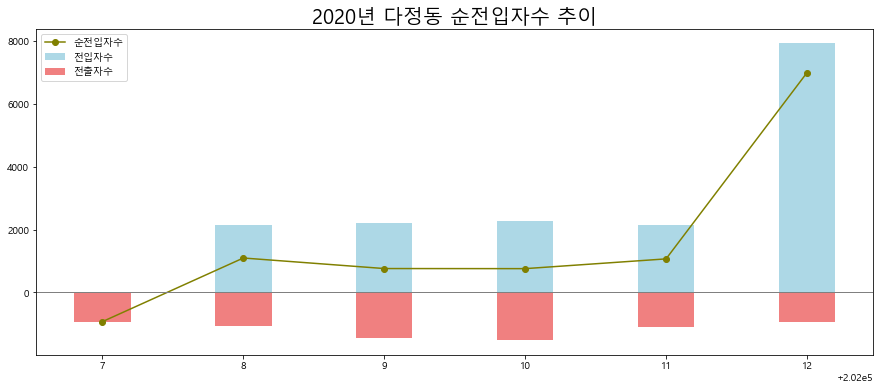

In [108]:
loc_list = ['고운동', '금남면', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면',
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동',
            '한솔동', '다정동']

for i,v in enumerate(loc_list):
    df_i = df_2020[df_2020['세종전입행정동'] == v]
    pyplot.figure(figsize=(15,6))
    pyplot.bar(df_i['년월'],df_i['전입자수'],color='lightblue',label='전입자수',width=0.4)
    pyplot.bar(df_i['년월'],-df_i['전출자수'],color='lightcoral',label='전출자수',width=0.4)
    pyplot.plot(df_i['년월'],df_i['순전입자수'],color='olive',label='순전입자수',marker='o')
    plt.axhline(y=0, color='gray', linewidth=1)
    plt.xticks(df_i['년월'])
    plt.legend()
    plt.title('2020년 {} 순전입자수 추이'.format(v),fontsize=20)
    plt.show()

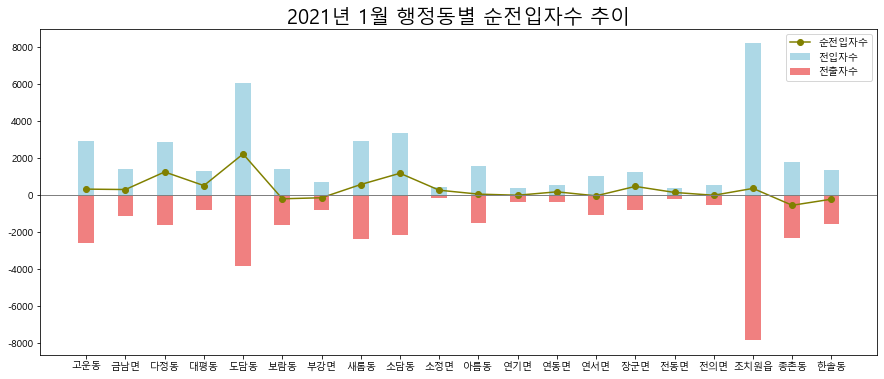

In [109]:
loc_list = ['고운동', '금남면', '다정동', '대평동', '도담동', '보람동', '부강면', '새롬동', '소담동', '소정면', 
            '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동', '한솔동']


pyplot.figure(figsize=(15,6))
pyplot.bar(df_2021['세종전입행정동'],df_2021['전입자수'],color='lightblue',label='전입자수',width=0.4)
pyplot.bar(df_2021['세종전입행정동'],-df_2021['전출자수'],color='lightcoral',label='전출자수',width=0.4)
pyplot.plot(df_2021['세종전입행정동'],df_2021['순전입자수'],color='olive',label='순전입자수',marker='o')
plt.axhline(y=0, color='gray', linewidth=1)
plt.title('2021년 1월 행정동별 순전입자수 추이',fontsize=20)
plt.xticks(df_2021['세종전입행정동'], loc_list)
plt.legend()
plt.show()